<a href="https://colab.research.google.com/github/FrankJRix/lab_util/blob/main/lab_utility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1: (6.08 +/- 0.28)V (scala: 8V)
2: (6.08 +/- 0.28)V (scala: 8V)
3: (6.08 +/- 0.28)V (scala: 8V)
4: (6.08 +/- 0.28)V (scala: 8V)
5: (5.86 +/- 0.28)V (scala: 8V)
6: (5.86 +/- 0.28)V (scala: 8V)
7: (5.86 +/- 0.28)V (scala: 8V)
8: (5.86 +/- 0.28)V (scala: 8V)
9: (5.86 +/- 0.28)V (scala: 8V)
10: (5.72 +/- 0.28)V (scala: 8V)
11: (5.55 +/- 0.28)V (scala: 8V)
12: (5.47 +/- 0.28)V (scala: 8V)
13: (5.44 +/- 0.28)V (scala: 8V)


1: (0.0628 +/- 0.0028)V (scala: 0.08V)
2: (0.3 +/- 0.014)V (scala: 0.4V)
3: (0.6 +/- 0.028)V (scala: 0.8V)
4: (2.58 +/- 0.14)V (scala: 4.0V)
5: (3.74 +/- 0.14)V (scala: 4.0V)
6: (3.85 +/- 0.14)V (scala: 4.0V)
7: (3.98 +/- 0.14)V (scala: 4.0V)
8: (4 +/- 0.28)V (scala: 8.0V)
9: (4.33 +/- 0.28)V (scala: 8.0V)
10: (4.61 +/- 0.28)V (scala: 8.0V)
11: (5.35 +/- 0.28)V (scala: 8.0V)
12: (5.43 +/- 0.28)V (scala: 8.0V)
13: (5 +/- 0.28)V (scala: 8.0V)


1: (0.00252 +/- 8.01e-05)s
2: (0.000486 +/- 1.6e-05)s
3: (0.000234 +/- 8.01e-06)s
4: (3.52e-05 +/- 8.02e-07)s
5: (1.54e-05 +/- 8.01

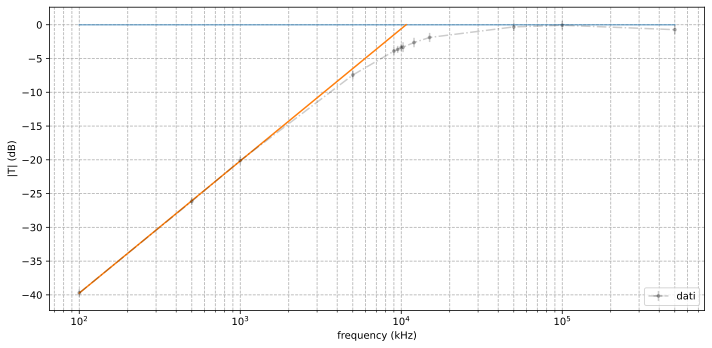

,err_phi,phi,err_t,err_vout,err_vin,div_t,div_vout,div_vin,V_i,V_o,t,f
0,2.884543,90.7200,8.012620e-05,0.0028,0.28,5.000000e-03,0.01,1,6.0750,0.0628,2.520000e-03,100
1,2.884410,87.4800,1.602450e-05,0.0140,0.28,1.000000e-03,0.05,1,6.0750,0.3000,4.860000e-04,500
2,2.884284,84.2400,8.011900e-06,0.0280,0.28,5.000000e-04,0.10,1,6.0750,0.6000,2.340000e-04,1000
3,1.443528,63.3600,8.019600e-07,0.1400,0.28,5.000000e-05,0.50,1,6.0750,2.5800,3.520000e-05,5000
4,2.595143,49.8960,8.009700e-07,0.1400,0.28,5.000000e-05,0.50,1,5.8625,3.7400,1.540000e-05,9000
5,2.739078,47.8800,8.009000e-07,0.1400,0.28,5.000000e-05,0.50,1,5.8625,3.8500,1.400000e-05,9500
6,2.883006,45.7200,8.008350e-07,0.1400,0.28,5.000000e-05,0.50,1,5.8625,3.9800,1.270000e-05,10000
7,2.957835,44.3232,8.008000e-07,0.2800,0.28,5.000000e-05,1.00,1,5.8625,4.0000,1.200000e-05,10260
8,0.072036,41.0400,1.667500e-08,0.2800,0.28,1.000000e-06,1.00,1,5.8625,4.3300,9.500000e-06,12000
9,0.089176,33.9120,1.651400e-08,0.2800,0.28,1.000000e-06,1.00,1,5.7250,4.6100,6.280000e-06,15000


In [36]:
from IPython.core.pylabtools import figsize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.stats import linregress as linfit

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg') # se su colab, in locale commentata

# la parte sotto va commentata su colab e scommentata in locale su una macchina aggiornata
#import matplotlib_inline
#matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')

# def funzioni

def errori_osc_volt(valori, div):
    """ si aspetta un array di valori misurati e uno di volt/div come da oscilloscopio
    in output array di errori """
    errors = []

    if len(valori) != len(div):
        print('mismatched input size')
        return
    
    for j in range(len(valori)):
        if div[j] >= 10e-3:
            percent = 0.03
        else:
            percent = 0.04
        
        scala = div[j]*8
        err = percent*scala + 0.005*scala

        errors.append(err)

        print(f'{j+1}: ({valori[j]:.3g} +/- {err:.3g})V (scala: {scala}V)')
    
    errors = np.array(errors)
    print('\n')

    return errors

def errori_osc_tempo(valori, div):
    """ si aspetta un array di valori misurati e uno di s/div come da oscilloscopio """
    errors = []

    if len(valori) != len(div):
        print('mismatched input size')
        return
    
    acc = 50e-6
    off = 200e-12
    factor = 16e-3 #16e-4 * num divisioni orizzontali

    for j in range(len(valori)):
        err = acc*valori[j] + off + factor*div[j]
        
        print(f'{j+1}: ({valori[j]:.3g} +/- {err:.3g})s')
        errors.append(err)
    
    errors = np.array(errors)
    print('\n')

    return errors

def leggi_csv(path):
    """ path relativo fino al .csv """
    data = pd.read_csv(path)
    data = data.replace(',','.', regex=True)
    data = data.apply(pd.to_numeric, errors='coerce')
    return data

def compute_phi(dt, err_t, f, err_f = []):
    """ si aspetta quattro (tre) array di valori di dt, errore su dt, frequenza e errore su frequenza (facoltativo)
    in output due array phi e err_phi """
    if len(dt) != len(f):
        print('mismatched input size')
        return
    if len(err_f) == 0:
        err_f = np.zeros(len(f))
    dt = np.array(dt)
    f = np.array(f)
    err_t = np.array(err_t)
    err_f = np.array(err_f)

    conv = 360/(2*np.pi)

    phi = 2*np.pi * f * dt
    phi = conv * phi

    err_phi = conv * np.sqrt((2*np.pi*f*err_t)**2+(2*np.pi*dt*err_f)**2)
    return phi, err_phi

def error_format(val, err):
    """ si aspetta un array di valori e uno di errori 
    in output array di stringhe formattate in latex pronte per tabella"""
    if len(val) != len(err):
        print('mismatched input size')
        return
    out = []
    for i in range(len(val)):
        tmp = f'{val[i]:.3g} $\pm$ {err[i]:.3g}'
        out.append(tmp)
    
    return out

def transf_func(vin, vout, err_vin = [], err_vout = []):
    """ quattro (due) array, V_in, V_out e rispettivi errori (facoltativi)
    output modulo e errore di T """
    vin = np.array(vin)
    vout = np.array(vout)
    if len(err_vin) == 0:
        err_vin = np.zeros(len(vin))
    else:
        err_vin = np.array(err_vin)
    if len(err_vin) == 0:
        err_vout = np.zeros(len(vout))
    else:
        err_vout = np.array(err_vout)

    x = 20 * np.log10(vout/vin)
    err_x = 20*np.sqrt( (err_vout/vout)**2 + (err_vin/vin)**2) / np.log(10)

    return x, err_x

def bode_plot(T, phi, f, err_T, err_phi, err_f = [], n_pa = 0, n_pb = 0):
    """ sei (cinque) array, modulo di T, fase di T, frequenza e rispettivi errori (facoltativo quello su f)
    num di valori prima di freq di taglio per pa e dopo pb (facoltativi, servono per fit)
    output grafici e stima di freq taglio """
    if len(err_f) == 0:
        err_f = np.zeros(len(f))

    t = np.linspace(f.min(), f.max(), 2)

    plt.figure(figsize=(10,5))
    plt.errorbar(f, T, yerr=err_T, xerr=err_f, label='dati', marker='.', linestyle='-.', alpha = 0.2, color='black')
    plt.plot(t, np.zeros(len(t)), alpha=0.5)

    if n_pa:
        l = np.log(f[:n_pa])

        fit_pa = linfit(l, T[:n_pa])

        q = fit_pa.intercept
        m = fit_pa.slope

        ft_pa = np.exp(-q/m)
        print(ft_pa)

        t_pa = np.linspace(f.min(), ft_pa, 2)
        l_pa = np.log(t_pa)

        plt.plot(t_pa, m*l_pa + q)

    #non testato!! dovrebbe funzionare a meno di typo lol
    if n_pb:
        l = np.log(f[n_pb:])

        fit_pa = linfit(l, T[n_pb:])

        q = fit_pa.intercept
        m = fit_pa.slope

        ft_pb = np.exp(-q/m)
        print(ft_pb)

        t_pb = np.linspace(f.max(), ft_pb, 2)
        l_pa = np.log(t_pb)

        plt.plot(t_pb, m*l_pb + q)

    plt.semilogx()
    plt.xlabel('frequency (kHz)')
    plt.ylabel('|T| (dB)')
    plt.grid(True, 'both', linestyle='--')

    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()


#playground

#valori divisioni
d_in = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
d_out = [10e-3, 50e-3, 100e-3, 500e-3, 500e-3, 500e-3, 500e-3, 1, 1, 1, 1, 1, 1]
d_t = [5e-3, 10e-4, 5e-4, 5e-5, 5e-5, 5e-5, 5e-5, 5e-5, 1e-6, 1e-6, 2e-7, 2e-7, 2e-8]

#esempio leggi_csv
data = leggi_csv('pa.csv')

#aggiustamenti al dataframe per dopo
data.insert(0, 'div_vin', d_in)
data.insert(0, 'div_vout', d_out)
data.insert(0, 'div_t', d_t)
data = data.drop(columns=['T', 'dt', 'dV'])

#esempio uso errori_osc_[]
err_vi = errori_osc_volt(data['V_i'], data['div_vin'])
err_vo = errori_osc_volt(data['V_o'], data['div_vout'])
err_t = errori_osc_tempo(data['t'], data['div_t'])

data.insert(0, 'err_vin', err_vi)
data.insert(0, 'err_vout', err_vo)
data.insert(0, 'err_t', err_t)

#esempio uso compute_phi
phi , err_phi = compute_phi(data['t'], data['err_t'], data['f'])

data.insert(0, 'phi', phi)
data.insert(0, 'err_phi', err_phi)

#esempio uso error_format
a =  error_format(data['phi'], data['err_phi'])
b =  error_format(data['V_i'], data['err_vin'])
c =  error_format(data['V_o'], data['err_vout'])

tab = pd.DataFrame()
tab.insert(0, 'phi', a)
tab.insert(0, 'vin', b)
tab.insert(0, 'vout', c)

#esempio uso transf_func
T, err_T = transf_func(data['V_i'], data['V_o'], data['err_vin'], data['err_vout'])

d = error_format(T, err_T)
tab.insert(0, 'T', d)

#per la tabella in latex, lo fa già pandas con queste flag e non vale la pena di wrapparla
tab = tab.to_latex(escape=False, index=False)
print(tab)

bode_plot(T, phi, data['f'], err_T, err_phi, n_pa=3)

display(data)